<a href="https://colab.research.google.com/github/kirtigarg38/Stock_prediction/blob/main/Stock%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tiingo import TiingoClient
import pandas as pd

api_key = "Replace with your key"

config = {'api_key': api_key}
client = TiingoClient(config)

# Fetch AAPL data with date range (required for this endpoint)
start_date = "2020-01-01"
end_date = "2024-01-01"

# Use get_ticker_price with date parameters
data = client.get_ticker_price(
    "AAPL",
    startDate=start_date,
    endDate=end_date,
    frequency='daily'
)

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())

                       date   close    high     low    open    volume  \
0  2020-01-02T00:00:00.000Z  300.35  300.60  295.19  296.24  33911864   
1  2020-01-03T00:00:00.000Z  297.43  300.58  296.50  297.15  36633878   
2  2020-01-06T00:00:00.000Z  299.80  299.96  292.75  293.79  29644644   
3  2020-01-07T00:00:00.000Z  298.39  300.90  297.48  299.84  27877655   
4  2020-01-08T00:00:00.000Z  303.19  304.44  297.16  297.16  33090946   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  72.717436  72.777964  71.468154  71.722368  135647456      0.0          1.0  
1  72.010478  72.773121  71.785317  71.942687  146535512      0.0          1.0  
2  72.584276  72.623014  70.877408  71.129201  118578576      0.0          1.0  
3  72.242903  72.850596  72.022583  72.593961  111510620      0.0          1.0  
4  73.405026  73.707662  71.945109  71.945109  132363784      0.0          1.0  


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2020-01-02T00:00:00.000Z,300.35,300.60,295.19,296.24,33911864,72.717436,72.777964,71.468154,71.722368,135647456,0.0,1.0
1,1,2020-01-03T00:00:00.000Z,297.43,300.58,296.50,297.15,36633878,72.010478,72.773121,71.785317,71.942687,146535512,0.0,1.0
2,2,2020-01-06T00:00:00.000Z,299.80,299.96,292.75,293.79,29644644,72.584276,72.623014,70.877408,71.129201,118578576,0.0,1.0
3,3,2020-01-07T00:00:00.000Z,298.39,300.90,297.48,299.84,27877655,72.242903,72.850596,72.022583,72.593961,111510620,0.0,1.0
4,4,2020-01-08T00:00:00.000Z,303.19,304.44,297.16,297.16,33090946,73.405026,73.707662,71.945109,71.945109,132363784,0.0,1.0


In [10]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,1001,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,192.445352,194.244557,191.819109,194.015928,37149570,0.0,1.0
1002,1002,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,191.898632,192.733622,191.679944,192.455292,28919310,0.0,1.0
1003,1003,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,191.998035,192.345948,189.950321,191.341972,47899806,0.0,1.0
1004,1004,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,192.425471,193.499030,192.017916,192.982131,34049898,0.0,1.0
1005,1005,2023-12-29T00:00:00.000Z,192.53,194.40,191.725,193.90,42672148,191.381733,193.240580,190.581534,192.743562,42672148,0.0,1.0


In [11]:
df1=df.reset_index()['close']

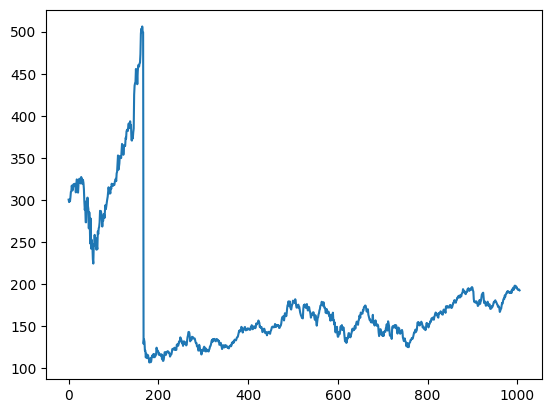

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.48468378]
 [0.47737007]
 [0.4833062 ]
 ...
 [0.21618034]
 [0.21725736]
 [0.21462743]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(653, 353)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [25]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - loss: 0.0539 - val_loss: 0.0032
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - loss: 0.0156 - val_loss: 0.0033
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.0141 - val_loss: 2.6753e-04
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0161 - val_loss: 2.4214e-04
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.0117 - val_loss: 2.1204e-04
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - loss: 0.0099 - val_loss: 0.0012
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0102 - val_loss: 1.9280e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0065 - val_loss: 5.3762e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - loss: 0.0099 - val_loss: 0.0026
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 0.0097 - val_loss: 0.0012
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 19

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


0.0686669079220559

In [32]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.03493229312340963

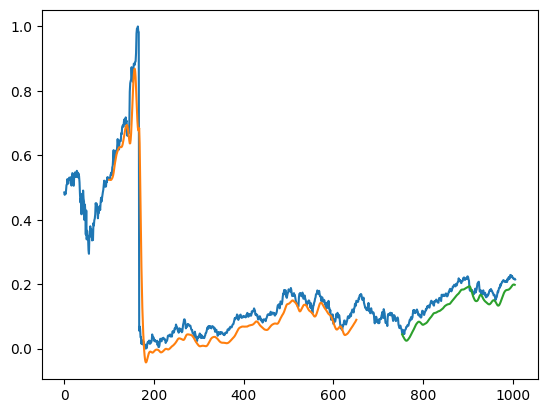

In [33]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [34]:
len(test_data)

353

In [35]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.19606012]
101
1 day input [0.17815905 0.1777082  0.18189105 0.17685661 0.17465247 0.1682154
 0.16944271 0.17282405 0.17630557 0.18604884 0.17417658 0.17976205
 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801 0.20753914
 0.19053225 0.17713212 0.17868503 0.18164058 0.17397621 0.16874139
 0.17257358 0.17074515 0.17815905 0.18091421 0.1719474  0.16804008
 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486 0.1612273
 0.16758923 0.16420789 0.16736381 0.17049468 0.17695679 0.18071384
 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.2

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt
len(df1)


1006

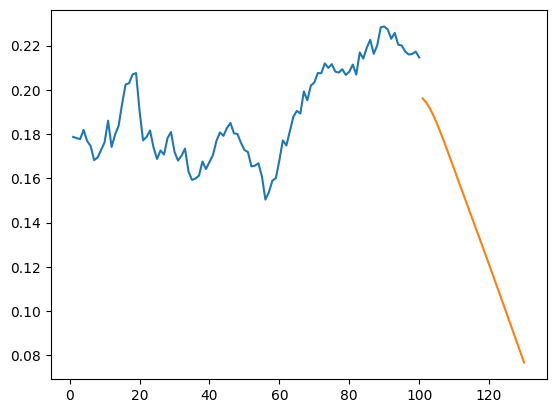

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


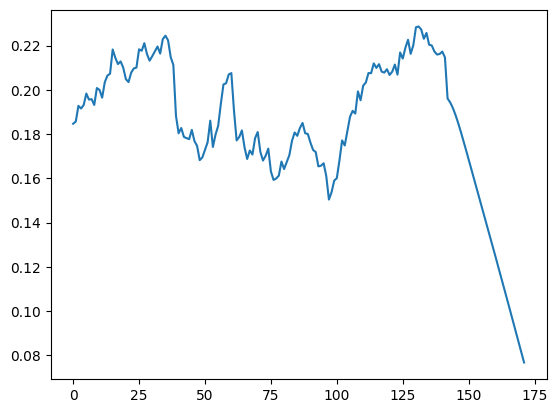

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[864:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

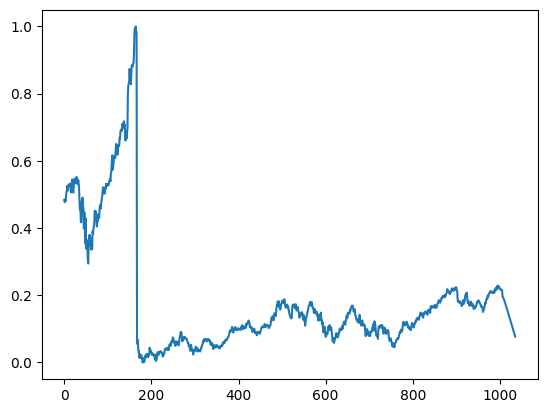

In [43]:
plt.plot(df3)